----------------------------------
# INTRODUCCION: 🛒 Análisis de clientes y comportamiento de compra - Store 1

Este análisis tiene como objetivo explorar los datos de compra de clientes de una tienda para identificar patrones útiles en la toma de decisiones comerciales. En particular, se analiza el total de gasto por cliente, las categorías más rentables y la relación entre edad y comportamiento de compra.

## Carga y limpieza de datos

### 📦 Datos originales

La información está organizada como una lista de listas. Cada usuario tiene:
- ID
- Nombre
- Edad
- Categorías favoritas
- Montos gastados por categoría


In [1]:
users = [
    ['32415', ' mike_reed ', 32.0, ['ELECTRONICS', 'SPORT', 'BOOKS'], [894, 213, 173]],
    ['31980', 'kate morgan', 24.0, ['CLOTHES', 'BOOKS'], [439, 390]],
    ['32156', ' john doe ', 37.0, ['ELECTRONICS', 'HOME', 'FOOD'], [459, 120, 99]],
    ['32761', 'SAMANTHA SMITH', 29.0, ['CLOTHES', 'ELECTRONICS', 'BEAUTY'], [299, 679, 85]],
    ['32984', 'David White', 41.0, ['BOOKS', 'HOME', 'SPORT'], [234, 329, 243]],
    ['33001', 'emily brown', 26.0, ['BEAUTY', 'HOME', 'FOOD'], [213, 659, 79]],
    ['33767', ' Maria Garcia', 33.0, ['CLOTHES', 'FOOD', 'BEAUTY'], [499, 189, 63]],
    ['33912', 'JOSE MARTINEZ', 22.0, ['SPORT', 'ELECTRONICS', 'HOME'], [259, 549, 109]],
    ['34009', 'lisa wilson ', 35.0, ['HOME', 'BOOKS', 'CLOTHES'], [329, 189, 329]],
    ['34278', 'James Lee', 28.0, ['BEAUTY', 'CLOTHES', 'ELECTRONICS'], [189, 299, 579]],
]


-----------------------------------
### 🧼 Limpieza y validación de datos

Creamos una función `clean_user()` para:
- Limpiar y formatear el nombre
- Convertir edad a entero
- Validar que haya el mismo número de categorías y gastos
- Calcular el gasto total por usuario


In [2]:

def clean_user(user_info):
    """Limpia el nombre y la edad del usuario, y calcula el total gastado"""
    user_id = user_info[0]
    name = user_info[1].strip().replace('_', ' ').title().split() # Eliminar espacios innecesarios, reemplazar _ por espacio y formatear nombre
    age = int(user_info[2]) # Convertir tipo de datos de edad en enteros
    categories = [cat.lower() for cat in user_info[3]] # Convertir categorías a minúsculas
    spendings = user_info[4]
    
    if len(categories) != len(spendings):
        print(f"[Aviso] Usuario {user_id} tiene datos inconsistentes.")

    total_spent = sum(spendings)
    
    return [user_id, name, age, categories, spendings, total_spent]

------------------------
### 🔁 Aplicación de limpieza a toda la base de usuarios

Recorremos cada usuario y aplicamos la función de limpieza, generando una nueva lista `users_clean`.


In [3]:
users_clean = []

for user in users:
    cleaned = clean_user(user)
    users_clean.append(cleaned)

-----------------------------
### Mostrar resumen por usuario


In [4]:
for user in users_clean:
    user_id = user[0]
    first_name = user[1][0]
    age = user[2]
    total = user[5]
    print(f"User {user_id} is {first_name} who is {age} years old and spent ${total} in total.")

User 32415 is Mike who is 32 years old and spent $1280 in total.
User 31980 is Kate who is 24 years old and spent $829 in total.
User 32156 is John who is 37 years old and spent $678 in total.
User 32761 is Samantha who is 29 years old and spent $1063 in total.
User 32984 is David who is 41 years old and spent $806 in total.
User 33001 is Emily who is 26 years old and spent $951 in total.
User 33767 is Maria who is 33 years old and spent $751 in total.
User 33912 is Jose who is 22 years old and spent $917 in total.
User 34009 is Lisa who is 35 years old and spent $847 in total.
User 34278 is James who is 28 years old and spent $1067 in total.


-----------------------------
## 🧾 Conversión de la lista limpia a un DataFrame de pandas
Ahora que tenemos todos los usuarios limpios y validados en la lista `users_clean`, los convertiremos en un `DataFrame` usando la biblioteca `pandas`. Esto facilitará el análisis, filtrado, visualización y exportación de los datos.


In [5]:
import pandas as pd
df_users = pd.DataFrame(users_clean, columns=[
    'user_id', 'name', 'age', 'categories', 'spendings', 'total_spent'
])
df_users.head()

,user_id,name,age,categories,spendings,total_spent
0,32415,"[Mike, Reed]",32,"[electronics, sport, books]","[894, 213, 173]",1280
1,31980,"[Kate, Morgan]",24,"[clothes, books]","[439, 390]",829
2,32156,"[John, Doe]",37,"[electronics, home, food]","[459, 120, 99]",678
3,32761,"[Samantha, Smith]",29,"[clothes, electronics, beauty]","[299, 679, 85]",1063
4,32984,"[David, White]",41,"[books, home, sport]","[234, 329, 243]",806


-----------------------------------------------------
## 🔍 Etapa: Análisis Exploratorio de Datos (EDA - Exploratory Data Analysis)

En esta sección se exploran los datos de clientes limpios para entender patrones generales como edad, gasto total, y comportamiento por usuario. Este análisis ayuda a identificar oportunidades y detectar anomalías antes de avanzar a modelos o visualizaciones más avanzadas. 



In [6]:
# Información general del DataFrame
display(df_users.head())

print("🔹 Estructura del DataFrame:")
df_users.info()

print("\n🔹 Estadísticas generales:")
print(df_users.describe())


,user_id,name,age,categories,spendings,total_spent
0,32415,"[Mike, Reed]",32,"[electronics, sport, books]","[894, 213, 173]",1280
1,31980,"[Kate, Morgan]",24,"[clothes, books]","[439, 390]",829
2,32156,"[John, Doe]",37,"[electronics, home, food]","[459, 120, 99]",678
3,32761,"[Samantha, Smith]",29,"[clothes, electronics, beauty]","[299, 679, 85]",1063
4,32984,"[David, White]",41,"[books, home, sport]","[234, 329, 243]",806


🔹 Estructura del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      10 non-null     object
 1   name         10 non-null     object
 2   age          10 non-null     int64 
 3   categories   10 non-null     object
 4   spendings    10 non-null     object
 5   total_spent  10 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 612.0+ bytes

🔹 Estadísticas generales:
             age  total_spent
count  10.000000    10.000000
mean   30.700000   918.900000
std     6.000926   178.371304
min    22.000000   678.000000
25%    26.500000   811.750000
50%    30.500000   882.000000
75%    34.500000  1035.000000
max    41.000000  1280.000000


---------------------------------------------------------------------------------------------
### 🧱 Estructura del DataFrame

Se puede observar que no hay datos nulos o ausentes y el tipo de datos en cada columna es el correcto. El único detalle a considerar es que `categories` y `spendings` están en listas, lo cual puede limitar ciertos análisis agregados si no se transforman en filas:
 
- `categories`: tipo `object`, porque contiene **listas de strings** (una lista por usuario).
- `spendings`: tipo `object`, porque contiene **listas de números** (una lista por usuario). 

**Más adelante se explotarán para analizarlas por separado.**

------------------------------------------------------------------------------------------------
### 🧠 Interpretación de las estadísticas generales

- El **número total de usuarios** es 10.
- La **edad promedio** de los usuarios es de **30.7 años**, con un rango de **22 a 41 años**, lo cual indica que la tienda tiene clientes principalmente adultos jóvenes.
- La **desviación estándar de edad** es baja (~6 años), lo que significa que no hay tanta variabilidad en la edad de los clientes.
- El **gasto total promedio** por usuario es de **$918.90**, con un mínimo de **$678** y un máximo de **$1280**.
- La **desviación estándar del gasto** también es moderada (~$178), lo que sugiere que hay cierta diferencia entre los clientes que gastan poco y los que gastan mucho, pero no hay valores extremadamente alejados.
- El **25% de los usuarios gastan menos de $811.75**, mientras que el **25% más alto gasta más de $1035**, lo que puede ser útil para segmentar a los clientes en perfiles de bajo y alto valor.

Estas métricas nos ayudan a identificar rangos normales y detectar posibles clientes clave o estrategias de marketing segmentadas.

---------------------------------------------------------------------------------
### 🧱 Separación de nombre y apellido

En el dataframe también se puede observar que  la columna `name` contiene listas como `['Mike', 'Reed']`, para mejorar la legibilidad de los datos, facilitar la ordenación y adecuar para visualización o exportación a formatos como CSV/Excel. Se separarán en dos columnas nuevas: `first_name` y `last_name`.

In [7]:
# Separar el nombre en columnas
df_users['first_name'] = df_users['name'].apply(lambda x: x[0])
df_users['last_name'] = df_users['name'].apply(lambda x: x[1] if len(x) > 1 else '')

# Eliminar columna original si ya no la necesitas
df_users.drop('name', axis=1, inplace=True)

# Se reordenan las columnas
df_users = df_users[['user_id', 'first_name', 'last_name', 'age', 'categories', 'spendings', 'total_spent']]

# Visualizar para confirmar
df_users.head()


,user_id,first_name,last_name,age,categories,spendings,total_spent
0,32415,Mike,Reed,32,"[electronics, sport, books]","[894, 213, 173]",1280
1,31980,Kate,Morgan,24,"[clothes, books]","[439, 390]",829
2,32156,John,Doe,37,"[electronics, home, food]","[459, 120, 99]",678
3,32761,Samantha,Smith,29,"[clothes, electronics, beauty]","[299, 679, 85]",1063
4,32984,David,White,41,"[books, home, sport]","[234, 329, 243]",806


### Si queremos conocer los 5 usuarios que más gastaron

In [8]:
print("🔹 Top 5 usuarios que más gastaron:")
df_users.sort_values(by='total_spent', ascending=False).head()


🔹 Top 5 usuarios que más gastaron:


,user_id,first_name,last_name,age,categories,spendings,total_spent
0,32415,Mike,Reed,32,"[electronics, sport, books]","[894, 213, 173]",1280
9,34278,James,Lee,28,"[beauty, clothes, electronics]","[189, 299, 579]",1067
3,32761,Samantha,Smith,29,"[clothes, electronics, beauty]","[299, 679, 85]",1063
5,33001,Emily,Brown,26,"[beauty, home, food]","[213, 659, 79]",951
7,33912,Jose,Martinez,22,"[sport, electronics, home]","[259, 549, 109]",917


---------------------------------------------------
### Expansión de categorías y gastos por fila

In [9]:
rows = []

for row in df_users.itertuples(index=False):
    for cat, amount in zip(row.categories, row.spendings):
        rows.append({
            'user_id': row.user_id,
            'first_name': row.first_name,
            'last_name': row.last_name,
            'age': row.age,
            'category': cat,
            'spending': amount
        })

In [10]:
# Crear DataFrame expandido

df_expanded = pd.DataFrame(rows)

# Visualizar para confirmar
df_expanded.head()


,user_id,first_name,last_name,age,category,spending
0,32415,Mike,Reed,32,electronics,894
1,32415,Mike,Reed,32,sport,213
2,32415,Mike,Reed,32,books,173
3,31980,Kate,Morgan,24,clothes,439
4,31980,Kate,Morgan,24,books,390


## Análisis por categoría

En esta sección se hará un análisis por categoria para conocer que categorias generan mayores ingresos, cuales necesitan mayor impulso y qué grupo de edad compra qué cosas (edad promedio por categoria). 

In [11]:
# Total gastado por categoría
print("\n🔹 Total gastado por categoría:")
print(df_expanded.groupby('category')['spending'].sum().sort_values(ascending=False))


🔹 Total gastado por categoría:
category
electronics    3160
clothes        1865
home           1546
books           986
sport           715
beauty          550
food            367
Name: spending, dtype: int64


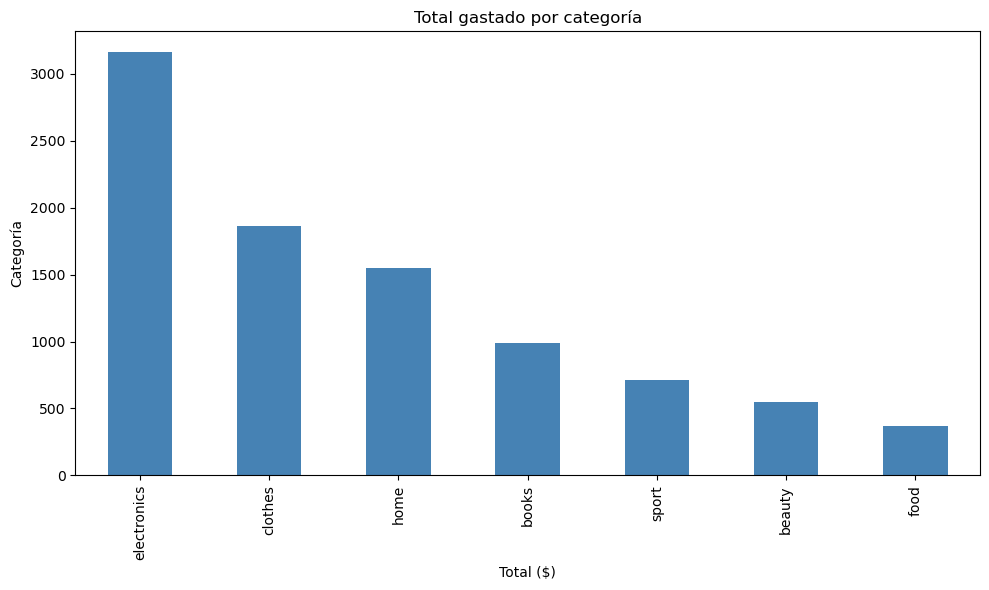

In [12]:
# Gráfica de barras: total gastado por categoría
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df_expanded.groupby('category')['spending'].sum().sort_values(ascending=False).plot(kind='bar', color='steelblue')
plt.title('Total gastado por categoría')
plt.xlabel('Total ($)')
plt.ylabel('Categoría')
plt.tight_layout()
plt.show()

Se observa claramente un dominio en los ingresos de la categoria 'electronics'. Parece ser la categoria más llamativa de la tienda.
- 'clothes' y 'home' también muestran buenos resultados en ventas, aunque a menor escala.
- Categorías como 'beauty' y 'food' tienen los menores ingresos, lo cual podría indicar oportunidades para promociones o campañas específicas.
- Este análisis permite priorizar esfuerzos de marketing en productos que ya tienen alta demanda, y reactivar el interés en aquellos que no se venden tanto.

In [13]:
# Edad promedio por categoría
print("\n🔹 Edad promedio por categoría:")
print(df_expanded.groupby('category')['age'].mean().round(1).sort_values())


🔹 Edad promedio por categoría:
category
beauty         29.0
electronics    29.6
clothes        29.8
sport          31.7
food           32.0
home           32.2
books          33.0
Name: age, dtype: float64


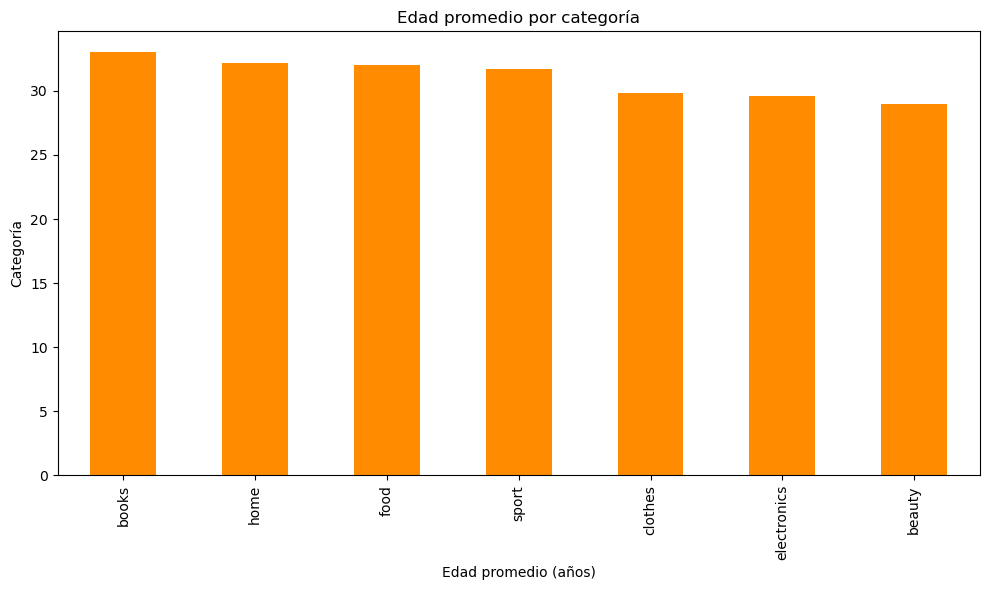

In [14]:
# Gráfica de barras: edad promedio por categoría
plt.figure(figsize=(10, 6))
df_expanded.groupby('category')['age'].mean().round(1).sort_values(ascending=False).plot(kind='bar', color='darkorange')
plt.title('Edad promedio por categoría')
plt.xlabel('Edad promedio (años)')
plt.ylabel('Categoría')
plt.tight_layout()
plt.show()

Las categorías más populares entre clientes jóvenes son 'beauty', 'electronics' y 'clothes', con edades promedio por debajo de 30 años.

Las categorías con clientes de mayor edad promedio son 'books', 'home' y 'food', superando los 32 años en promedio.

**Esto sugiere que las campañas de marketing para productos como libros o artículos del hogar pueden enfocarse en un público más adulto, mientras que productos de belleza o moda pueden orientarse a segmentos jóvenes.**

**Estas diferencias permiten segmentar las campañas por edad, aumentando la probabilidad de conversión según intereses específicos por grupo generacional.**

In [15]:
# Frecuencia de cada categoría
print("\n🔹 Frecuencia de compra por categoría:")
print(df_expanded['category'].value_counts())


🔹 Frecuencia de compra por categoría:
category
electronics    5
home           5
clothes        5
beauty         4
books          4
sport          3
food           3
Name: count, dtype: int64


- Las categorías 'electronics', 'home' y 'clothes' son las más frecuentemente compradas, con 5 apariciones cada una. Esto refuerza su posición como productos clave para el negocio.

- 'beauty' y 'books' tienen una frecuencia media (4), lo que sugiere una oportunidad de crecimiento moderado si se impulsan adecuadamente.

- 'sport' y 'food' son las categorías menos frecuentes (3 compras cada una), lo cual puede indicar menor interés o menor exposición. Estas áreas podrían explorarse con promociones específicas para aumentar su rotación.

**Conocer la frecuencia ayuda a entender el volumen de interés por categoría, y puede guiar tanto el inventario como las estrategias de marketing.**

## ✅ Conclusión ejecutiva del análisis

Este análisis exploratorio sobre el comportamiento de compra de los clientes de Store 1 permite identificar patrones clave para mejorar las estrategias comerciales:

- **Electronics**, **clothes** y **home** son las categorías más rentables y frecuentes. Estas áreas deben continuar siendo impulsadas con campañas destacadas y visibilidad prioritaria.
- Las categorías **beauty**, **sport** y **food** presentan menor frecuencia y gasto, lo cual representa una oportunidad para generar interés mediante promociones, bundles o nuevos lanzamientos.
- El análisis de **edad promedio por categoría** muestra que productos como beauty, electronics y clothes atraen a un público más joven, mientras que books, home y food son más comunes en usuarios mayores de 32 años.
- Este conocimiento permite segmentar las campañas de marketing según **grupo de edad** y **preferencias de compra**, aumentando la relevancia de cada contacto con el cliente.
- Como propuesta adicional, se sugiere simular la evolución del gasto por cliente hacia niveles de fidelización para medir la viabilidad de programas de lealtad.

En resumen, Store 1 puede utilizar estos datos para tomar decisiones más informadas sobre inventario, segmentación, y campañas comerciales enfocadas en el comportamiento real del cliente.
